# 实验练习07 参考答案

## 2. 气象数据分析

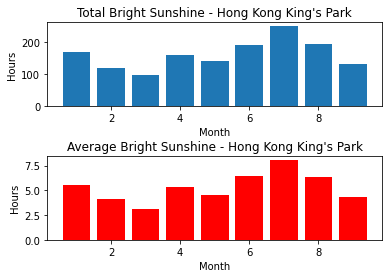

In [1]:
import numpy as np
import matplotlib.pyplot as plt

month = np.arange(1,10)  # 生成1~9的序列，用于后期绘图的横坐标
days = np.array([31,29,31,30,31,30,31,31,30])  # 存储每月的天数，用于后期计算平均日照
sum_sun = np.zeros(9)  # 生成长度为9的一维全零数组，用于存储各月份的总日照时长
avg_sun = np.empty(9) # 生成长度为9的一维空数组，用于存储各月份的平均日照时长

# 已预先删除文件的最后几行的注释内容
with open('data/daily_KP_SUN_2020-Copy1.csv','r',encoding='utf-8') as f:
    for _ in range(3):  # 跳过标题、列名等前3行内容
        f.readline()
    for line in f:
        line = line.strip()
        elements = line.split(',')
        sum_sun[int(elements[1]) - 1] += float(elements[3])  # 注意数组下标和实际月份差1
avg_sun = sum_sun / days  # Numpy可直接进行数组之间的数学运算

plt.subplot(211)
plt.title("Total Bright Sunshine - Hong Kong King's Park")
plt.xlabel('Month')
plt.ylabel('Hours')
plt.bar(month,sum_sun)

plt.subplot(212)
plt.title("Average Bright Sunshine - Hong Kong King's Park")
plt.xlabel('Month')
plt.ylabel('Hours')
plt.bar(month,avg_sun,color='red')

plt.subplots_adjust(hspace=0.6) # 调整子图之间的纵向间隔，避免上方子图的横坐标标签与下方子图的标题重叠
plt.show()

## 3. 判断鸢尾花类别

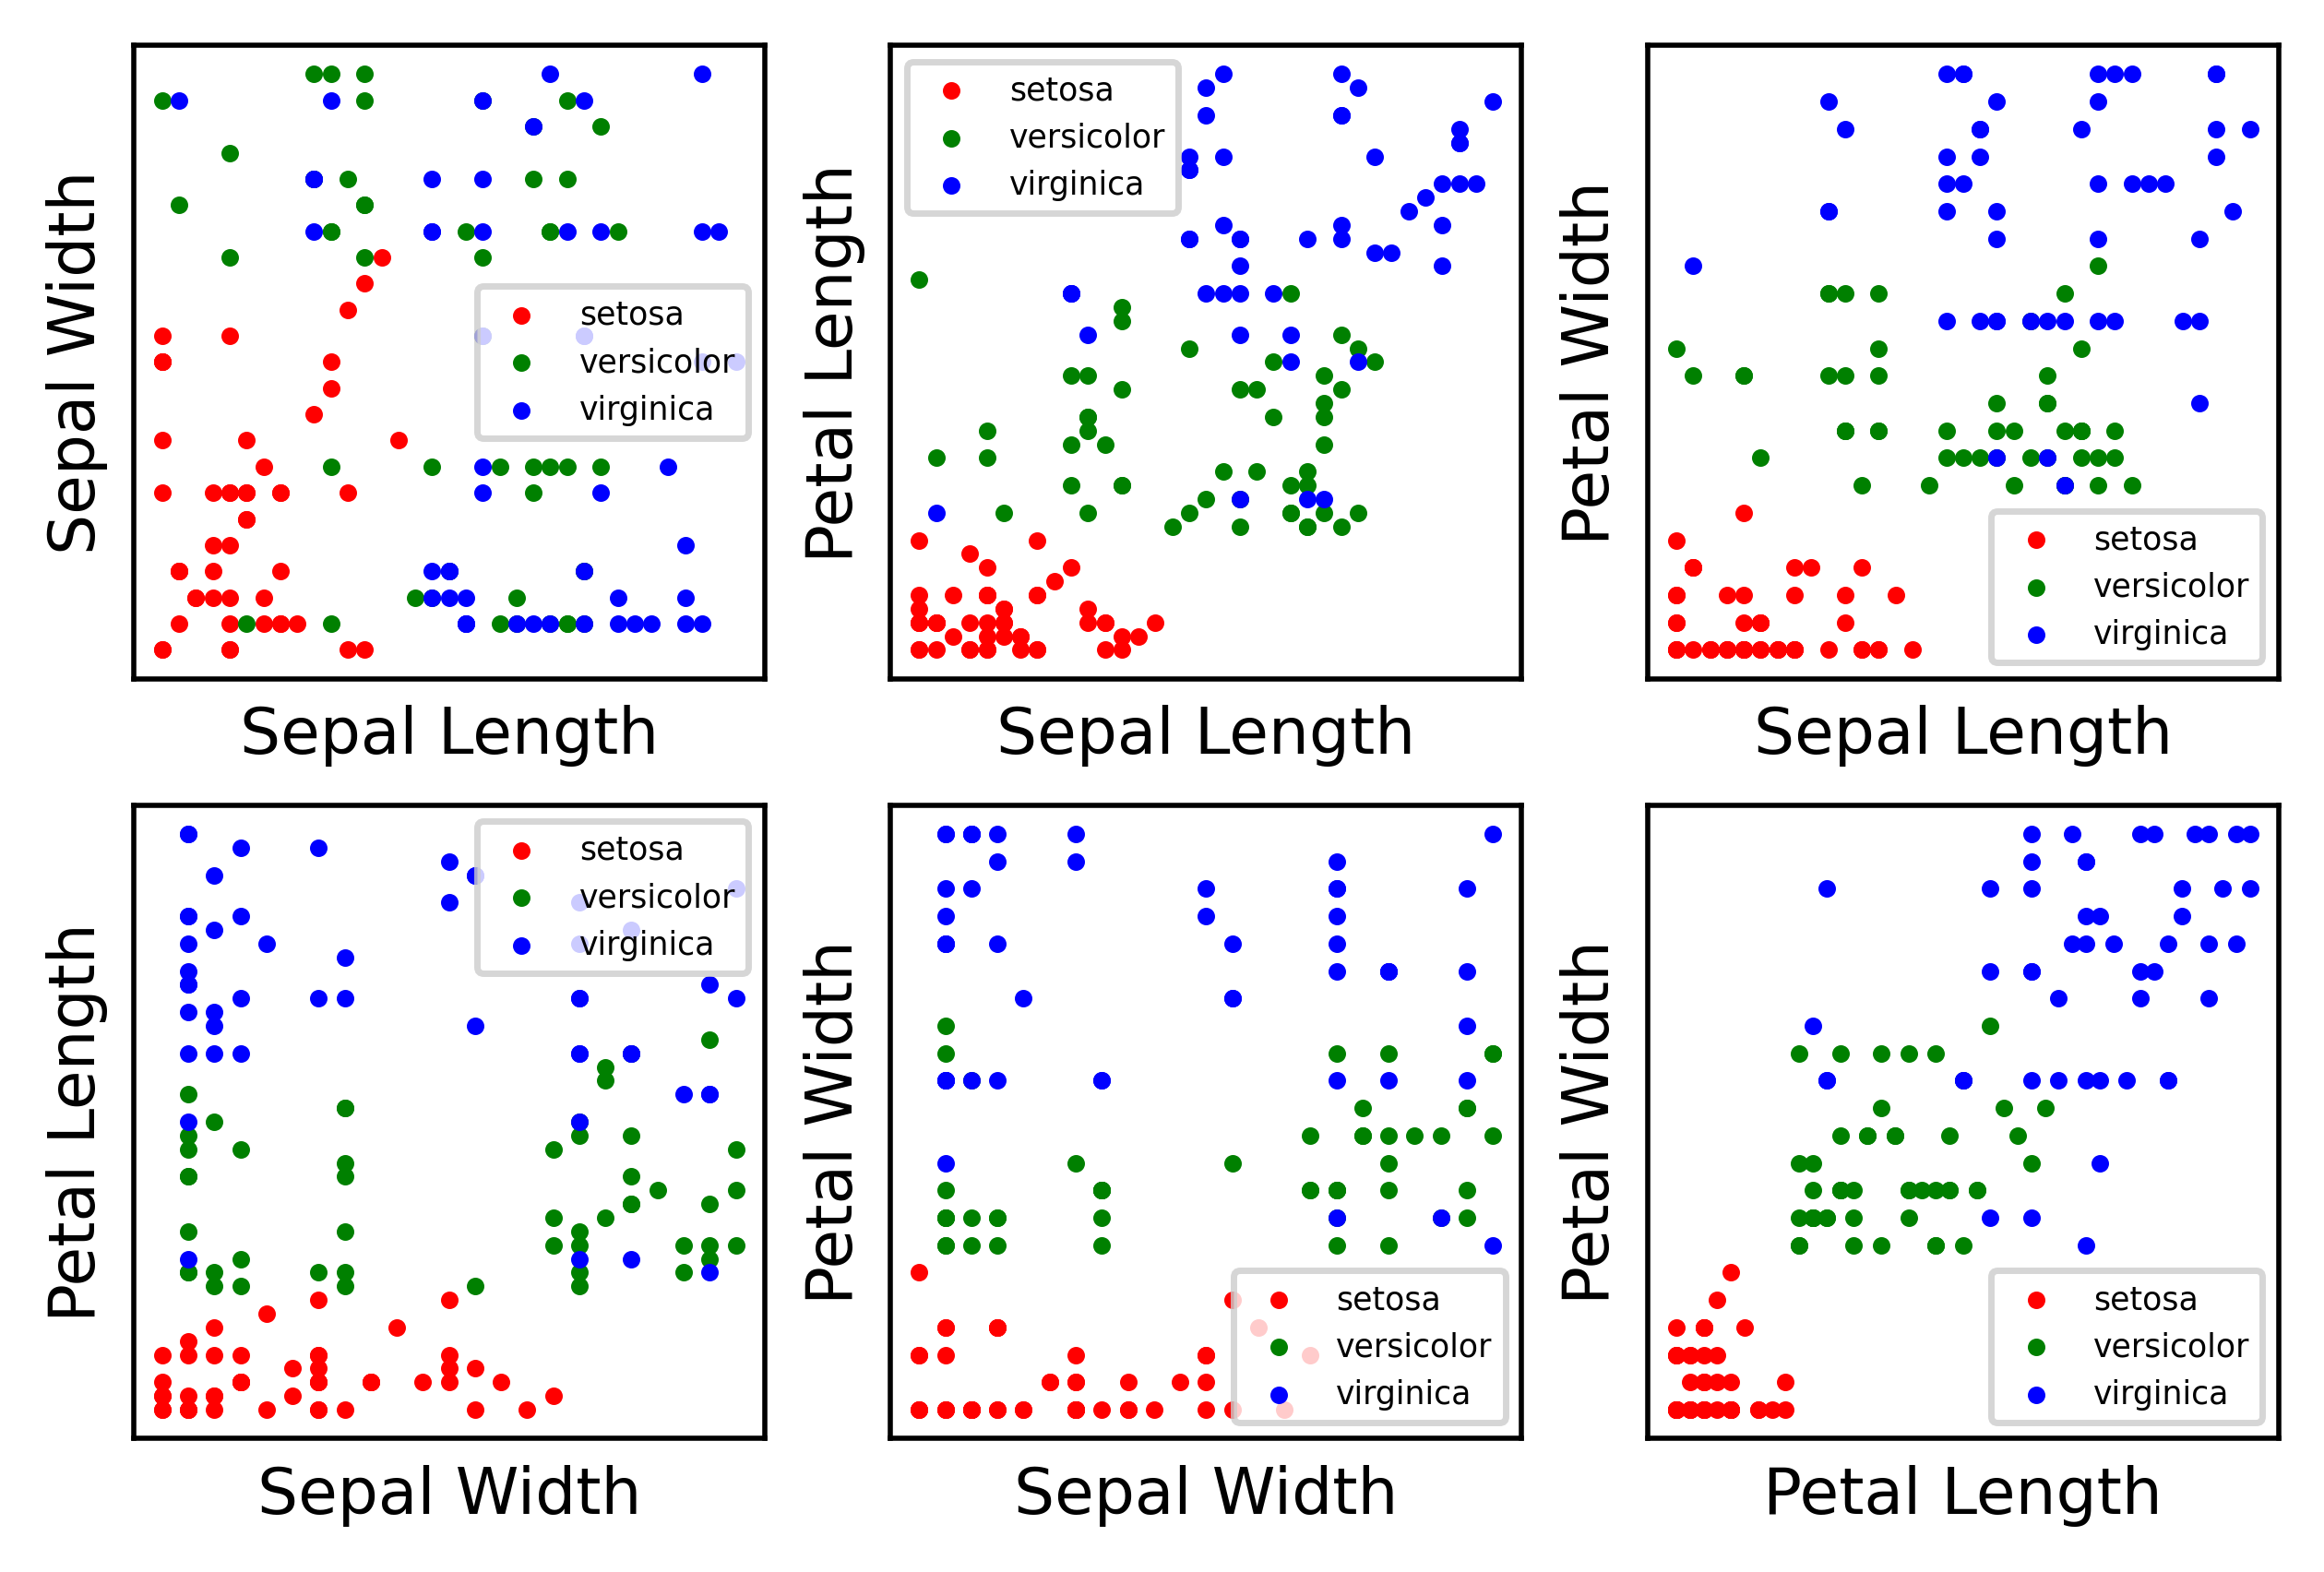

In [2]:
import numpy as np
import matplotlib.pyplot as plt

feature = {0:'Sepal Length', 1:'Sepal Width', 2:'Petal Length', 3:'Petal Width'}  # 后期绘图时用于标注坐标轴
color_dict = {0:'r', 1:'g' ,2:'b'}  # 后期绘图时不同种类的花标注不同颜色，以便区分

# 建立一个字典，键分别为三种花的类别，值为一个列表，列表的元素为一个个由4个属性值组成的小列表
data = {'setosa':[],
        'versicolor':[],
        'virginica':[]}

with open('data/iris.csv','r') as f:
    f.readline()
    for line in f:
        line = line.strip()
        elements = line.split(',')
        data[elements[4]].append(elements[0:4])

plt.figure(dpi=500)  # 设置输出图像的大小，避免子图“挤”在一起
subplot_count = 1  # 用以确定当前绘制子图的编号
for feature_1 in range(3):
    for feature_2 in range(feature_1 + 1, 4):  # 分别迭代4个属性的两两组合
        color_count = 0
        plt.subplot(23*10+subplot_count)  # 确定子图顺序
        for species,values in data.items():  # 分别绘制每种花的散点图
            values = np.array(values)  # 先转换为numpy数组，方便下一行语句中直接提取二维数组的某列元素
            plt.scatter(values[:,feature_1], values[:,feature_2], color=color_dict[color_count],s=3,label=species)
            # values[:,feature_1] 用于提取二维的numpy数组的某一列（':'表示选取所有行）
            color_count += 1
        plt.xticks([])  # 隐藏坐标轴的刻度
        plt.yticks([])
        plt.xlabel(feature[feature_1])  # 添加坐标轴标签，方便识别
        plt.ylabel(feature[feature_2])
        plt.legend(fontsize=5)  # 显示图例并设置大小
        subplot_count += 1

可以看到通过花瓣长度（Petal Length）和花瓣宽度（Petal Width）这两个变量可较好地确定鸢尾花的种类（如右下图所示）。